In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option('display.max_columns', 120)

In [2]:
with pd.HDFStore("../data/train.h5", "r") as train:
    # Note that the "train" dataframe is the only dataframe in the file
    df = train.get("train")

In [3]:
labels = []
values = []
for col in df.columns:
    labels.append(col)
    values.append(df[col].isnull().sum())
    print(col, values[-1])

id 0
timestamp 0
derived_0 72959
derived_1 81029
derived_2 398651
derived_3 149471
derived_4 406458
fundamental_0 23947
fundamental_1 679070
fundamental_2 368840
fundamental_3 454380
fundamental_5 962020
fundamental_6 701625
fundamental_7 26340
fundamental_8 373166
fundamental_9 565567
fundamental_10 112977
fundamental_11 368840
fundamental_12 110871
fundamental_13 355138
fundamental_14 356084
fundamental_15 354897
fundamental_16 355138
fundamental_17 97222
fundamental_18 15833
fundamental_19 54588
fundamental_20 110871
fundamental_21 54333
fundamental_22 558488
fundamental_23 356723
fundamental_24 576655
fundamental_25 121894
fundamental_26 657184
fundamental_27 281298
fundamental_28 667331
fundamental_29 354106
fundamental_30 354907
fundamental_31 454380
fundamental_32 111672
fundamental_33 13835
fundamental_34 434862
fundamental_35 424476
fundamental_36 15843
fundamental_37 355843
fundamental_38 803489
fundamental_39 377574
fundamental_40 279702
fundamental_41 30115
fundamental_42 2

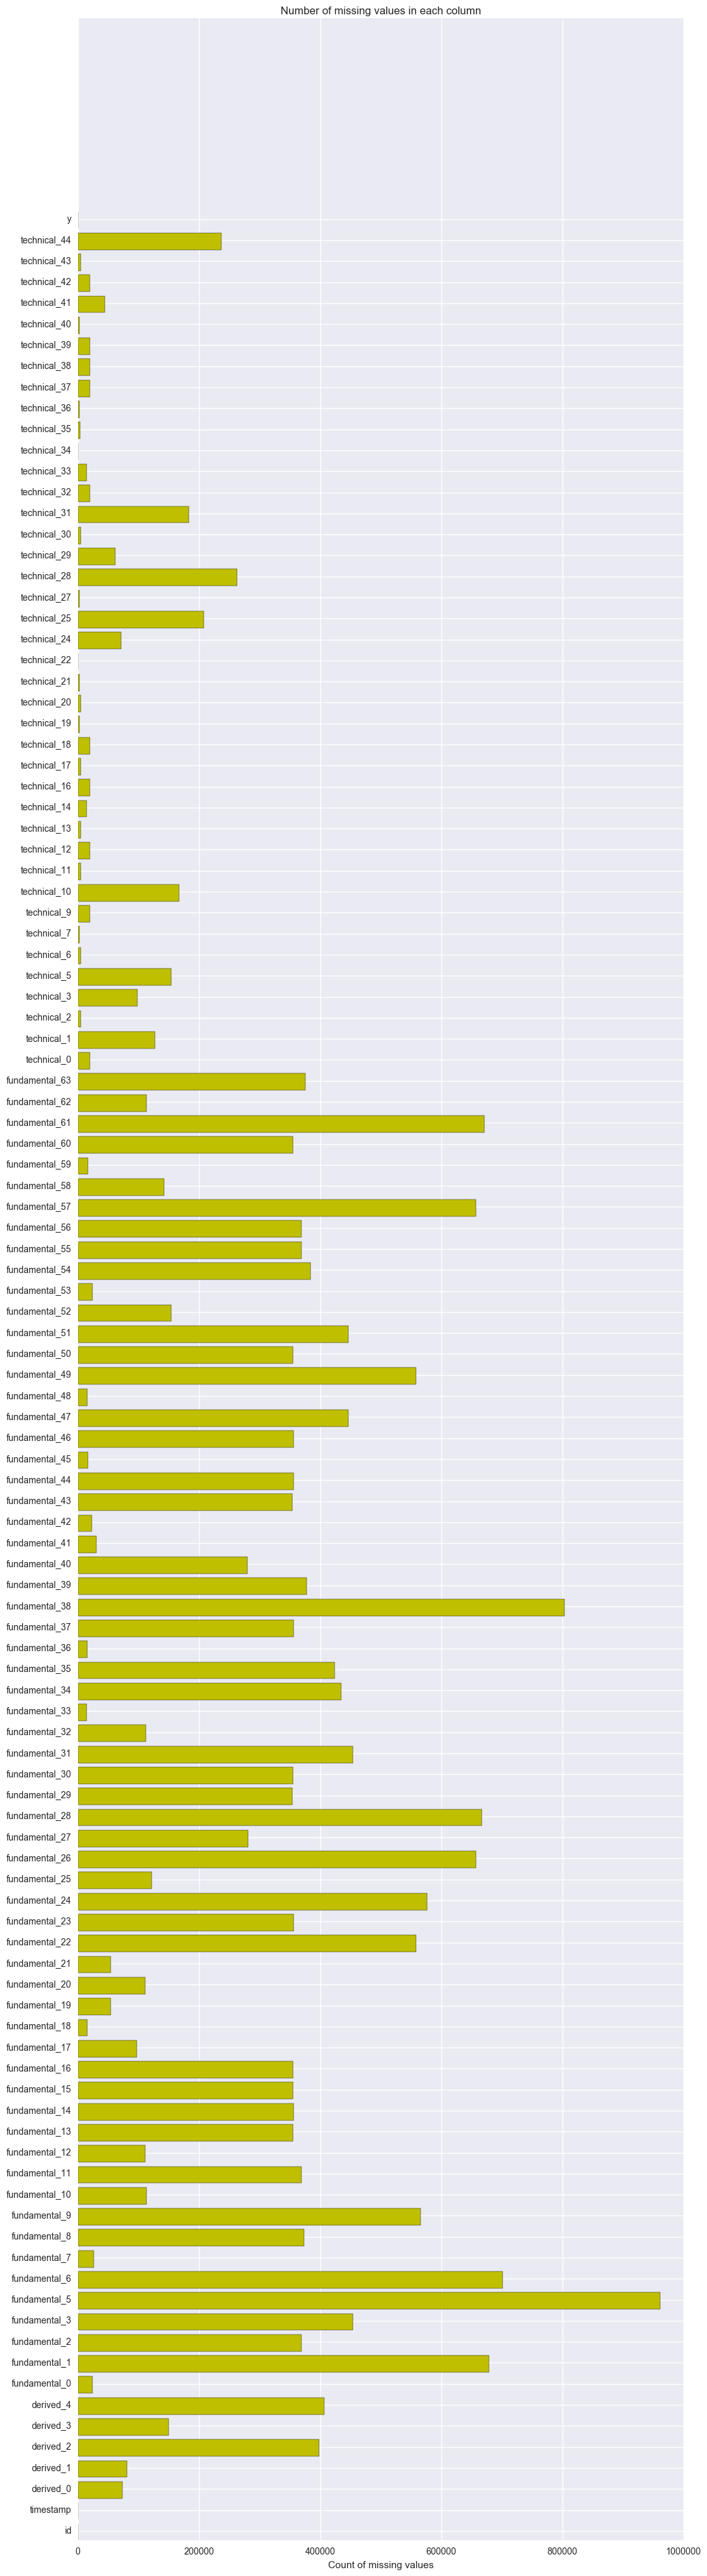

In [4]:
ind = np.arange(len(labels))
width = 0.9
fig, ax = plt.subplots(figsize=(12,50))
rects = ax.barh(ind, np.array(values), color='y')
ax.set_yticks(ind+((width)/2.))
ax.set_yticklabels(labels, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
#autolabel(rects)
plt.show()

In [5]:
temp_df = df.groupby('id')['y'].agg('mean').reset_index().sort_values(by='y')
temp_df.head()

,id,y
954,1431,-0.035077
62,93,-0.032797
585,882,-0.015408
1085,1637,-0.014028
742,1118,-0.011848


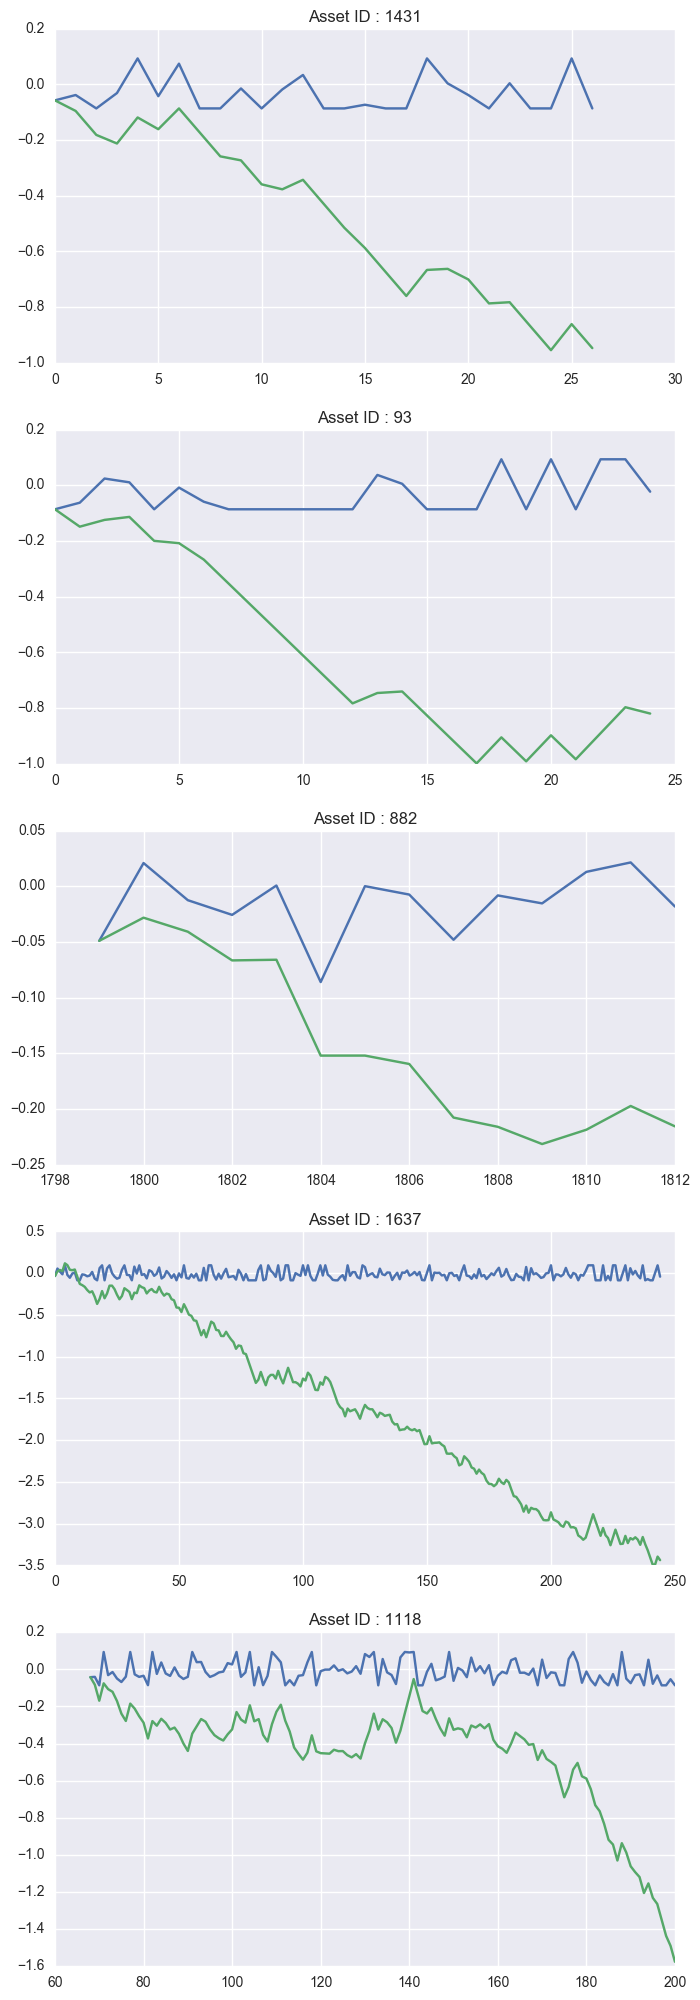

In [6]:
id_to_use = [1431, 93, 882, 1637, 1118]
fig = plt.figure(figsize=(8, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['id']==id_val,:]
    plt.plot(temp_df.timestamp.values, temp_df.y.values)
    plt.plot(temp_df.timestamp.values, temp_df.y.cumsum())
    plt.title("Asset ID : "+str(id_val))
    
plt.show()

In [7]:
temp_df = df.groupby('id')['y'].agg('mean').reset_index().sort_values(by='y')
temp_df.tail()

,id,y
506,767,0.006385
148,226,0.006400
545,824,0.006730
1195,1809,0.007290
726,1089,0.010827


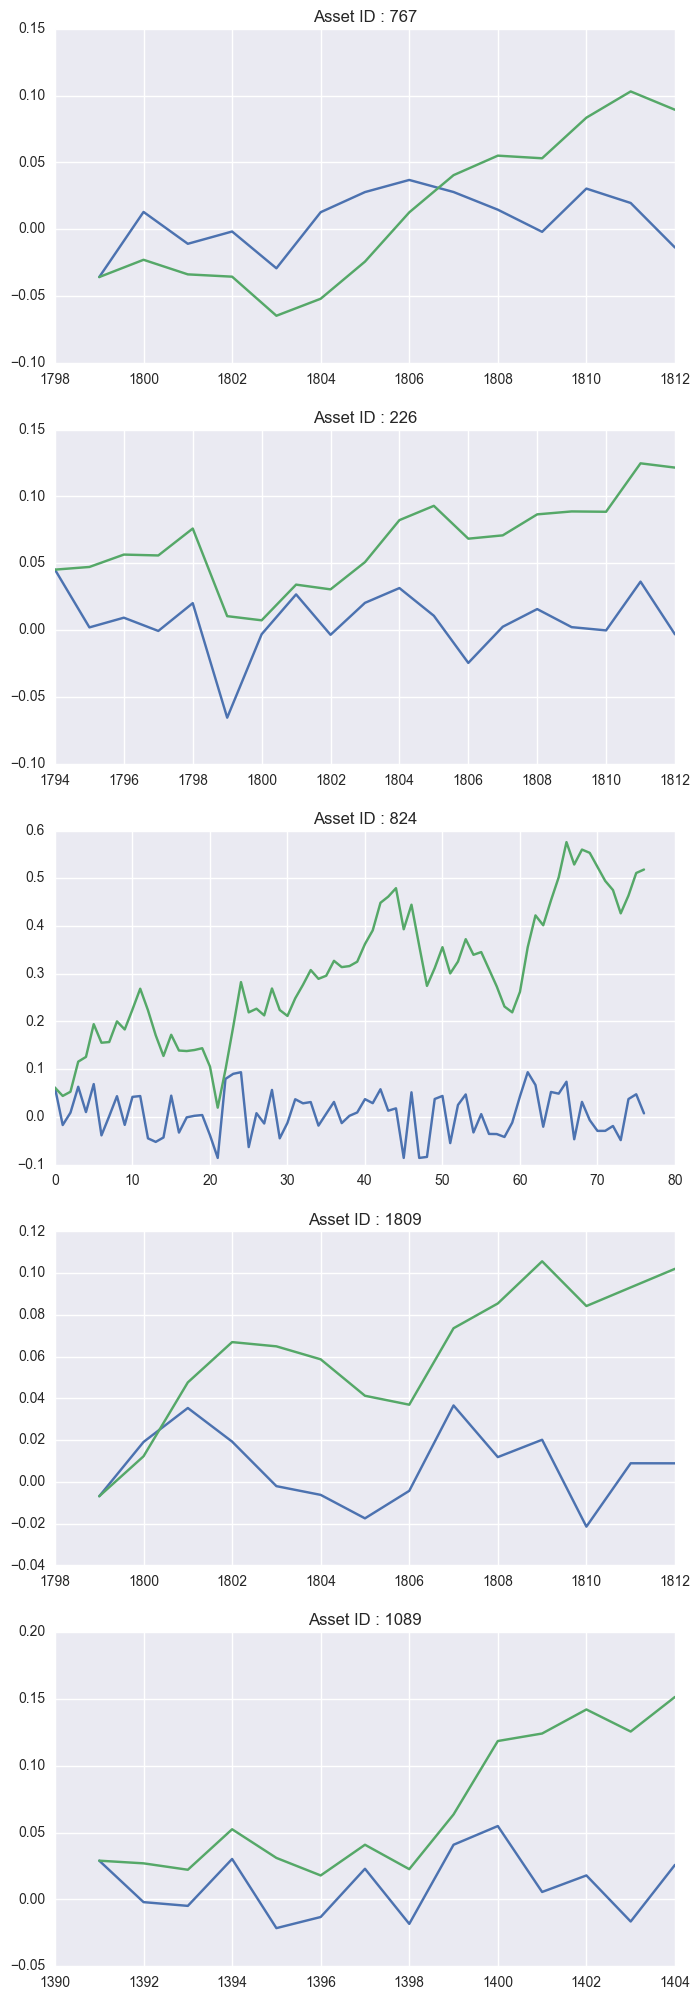

In [8]:
id_to_use = [767, 226, 824, 1809, 1089]
fig = plt.figure(figsize=(8, 25))
plot_count = 0
for id_val in id_to_use:
    plot_count += 1
    plt.subplot(5, 1, plot_count)
    temp_df = df.ix[df['id']==id_val,:]
    plt.plot(temp_df.timestamp.values, temp_df.y.values)
    plt.plot(temp_df.timestamp.values, temp_df.y.cumsum())
    plt.title("Asset ID : "+str(id_val))
plt.show()